In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 10s 1us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

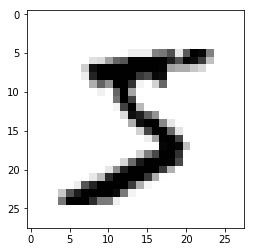

In [16]:
plt.imshow(x_train[0],cmap='gray_r')

In [17]:
y_train.shape

(60000,)

In [18]:
from keras.utils.np_utils import to_categorical

In [19]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [20]:
y_cat_test.shape

(10000, 10)

In [22]:
x_train[0].max()

255

In [23]:
x_train = x_train / x_train.max()

In [24]:
x_test = x_test / x_test.max()

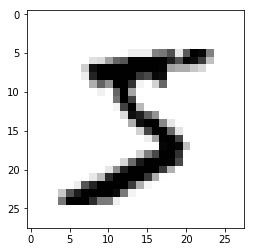

In [26]:
plt.imshow(x_train[0],cmap='gray_r')

In [27]:
x_train = x_train.reshape(60000,28,28,1)

In [28]:
x_train.shape

(60000, 28, 28, 1)

In [29]:
x_test = x_test.reshape(10000,28,28,1)

In [31]:
from keras.models import Sequential

In [32]:
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [34]:
model = Sequential()
# Convolutional Layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1), activation='relu'))
# Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))
# Flatten out 2D --> 1D - Prepare for DNN feed
model.add(Flatten())
# Dense Layer
model.add(Dense(128,activation='relu'))
# Output Layer - Classifier
model.add(Dense(10,activation='softmax'))
# Compile
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(x_train,y_cat_train,epochs=2)

Epoch 1/2
60000/60000 [==============================] - 38s 627us/step - loss: 0.1316 - acc: 0.9595
Epoch 2/2
60000/60000 [==============================] - 36s 603us/step - loss: 0.0481 - acc: 0.9855


In [37]:
model.metrics_names

['loss', 'acc']

In [38]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 2s 168us/step


[0.039642799984663725, 0.987]

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
predictions = model.predict_classes(x_test)

In [41]:
print(classification_report(predictions,y_cat_test))

ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets